In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# import and read the data

filepath = "/content/drive/MyDrive/Colab_Notebooks/Lung_Cancer_project/Lung_Cancer.csv"
LC_data = pd.read_csv(filepath)
df = pd.DataFrame(LC_data)


## Overview of the data

In [60]:
df = pd.DataFrame(LC_data)
print(df.columns) # Print only the column names (heading)

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived', 'region_encoded',
       'cancer_stage_encoded', 'gender_encoded', 'smoking_status_encoded'],
      dtype='object')


In [61]:
LC_data.head() # Shows the first 5 rows

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,region_encoded,cancer_stage_encoded,gender_encoded,smoking_status_encoded
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,...,0,1,0,Chemotherapy,2017-09-10,0,2.0,0.0,0.0,2.0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,...,1,0,0,Surgery,2024-06-17,1,3.0,2.0,1.0,2.0
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,...,1,0,0,Combined,2024-04-09,0,0.0,2.0,1.0,1.0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,...,1,0,0,Chemotherapy,2017-04-23,0,3.0,0.0,1.0,2.0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,...,0,0,0,Combined,2025-01-08,0,3.0,0.0,0.0,2.0


In [62]:
LC_data.info() # Shows data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      890000 non-null  int64  
 1   age                     890000 non-null  float64
 2   gender                  890000 non-null  object 
 3   country                 890000 non-null  object 
 4   diagnosis_date          890000 non-null  object 
 5   cancer_stage            890000 non-null  object 
 6   family_history          890000 non-null  object 
 7   smoking_status          890000 non-null  object 
 8   bmi                     890000 non-null  float64
 9   cholesterol_level       890000 non-null  int64  
 10  hypertension            890000 non-null  int64  
 11  asthma                  890000 non-null  int64  
 12  cirrhosis               890000 non-null  int64  
 13  other_cancer            890000 non-null  int64  
 14  treatment_type      

In [69]:
LC_data["smoking_status"].value_counts()  # Frequency of each country

,count
smoking_status,
Passive Smoker,223170
Never Smoked,222751
Former Smoker,222181
Current Smoker,221898


In [64]:
LC_data.describe()          # Summary stats for numerical columns

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,region_encoded,cancer_stage_encoded,gender_encoded,smoking_status_encoded
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229,1.298367,1.500148,0.499849,1.499118
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401,1.180075,1.118078,0.500000,1.117681
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000,2.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000


## Visualizing the data

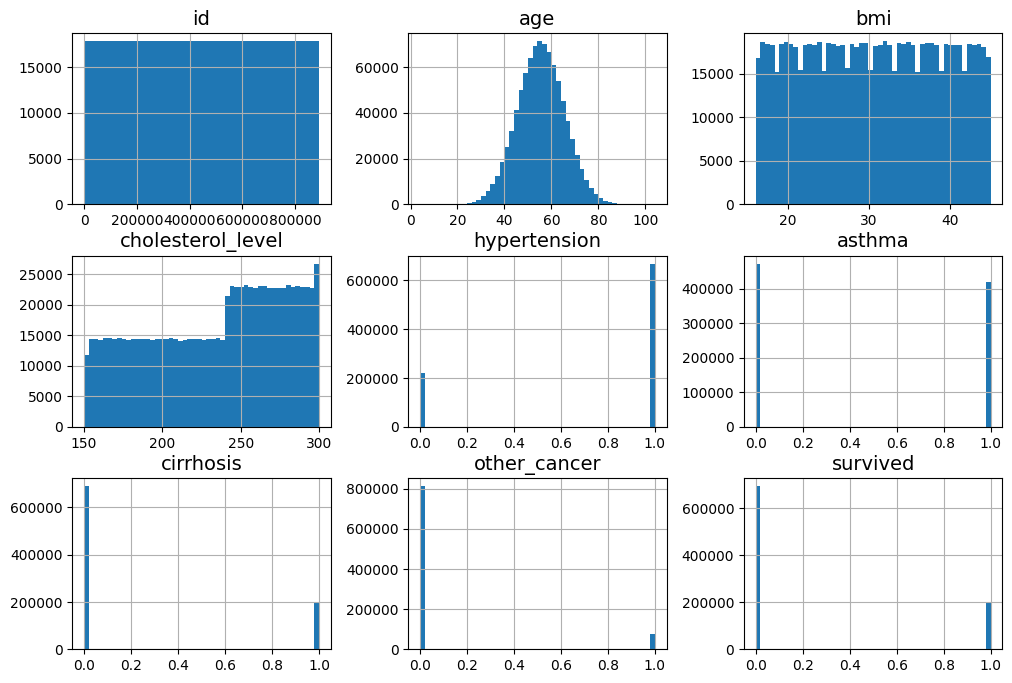

In [ ]:
# visulaize the data

# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

LC_data.hist(bins=50, figsize=(12, 8))
plt.show()

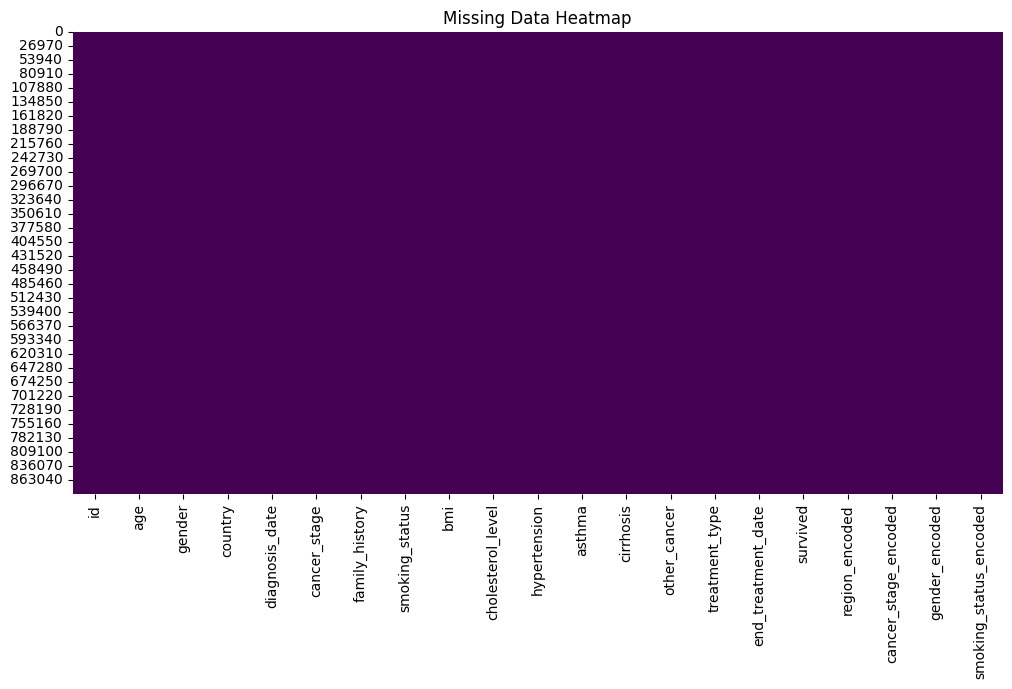

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(LC_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


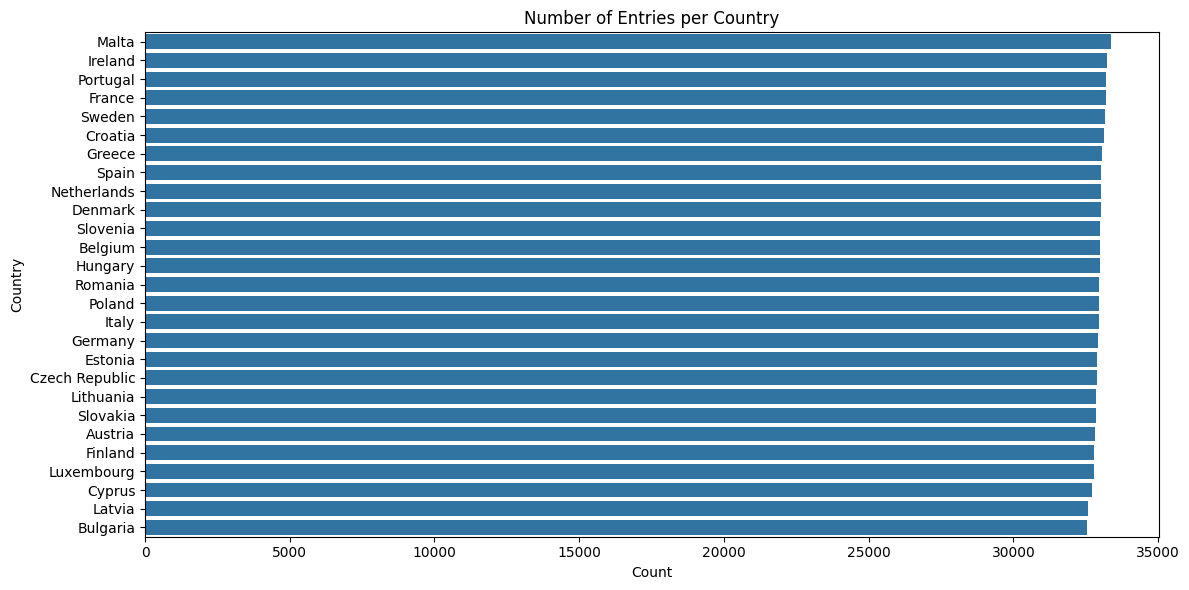

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=LC_data, y="country", order=LC_data['country'].value_counts().index)
plt.title("Number of Entries per Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

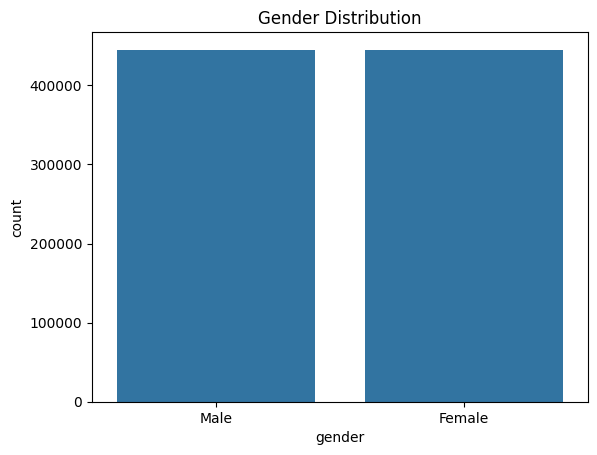

In [47]:
sns.countplot(data=LC_data, x='gender')
plt.title("Gender Distribution")
plt.show()


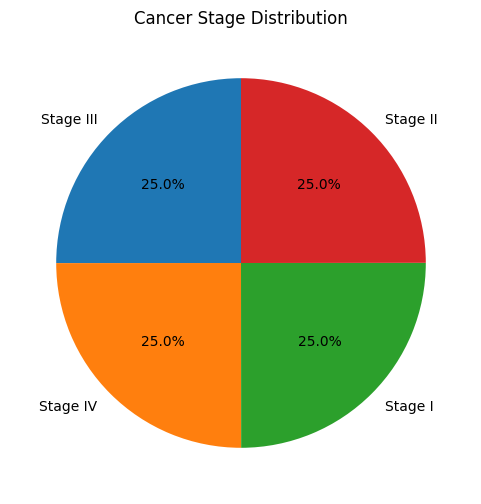

In [48]:
LC_data['cancer_stage'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Cancer Stage Distribution")
plt.ylabel('')
plt.show()


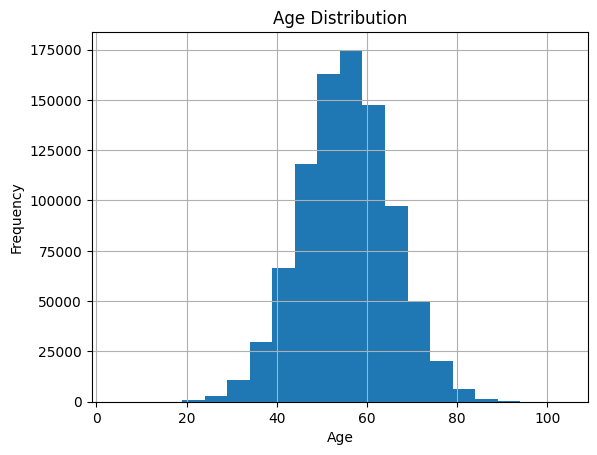

In [49]:
LC_data['age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


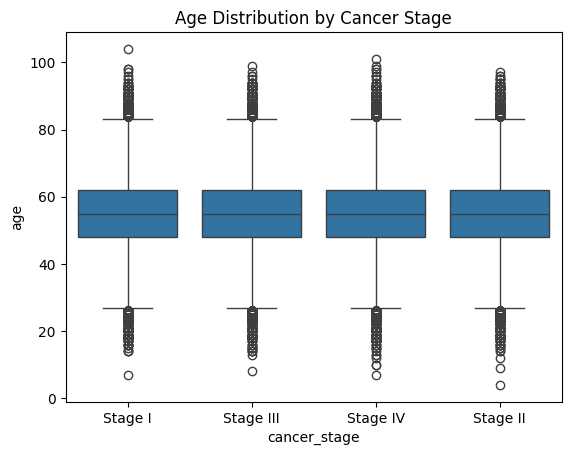

In [50]:
sns.boxplot(data=LC_data, x='cancer_stage', y='age')
plt.title("Age Distribution by Cancer Stage")
plt.show()


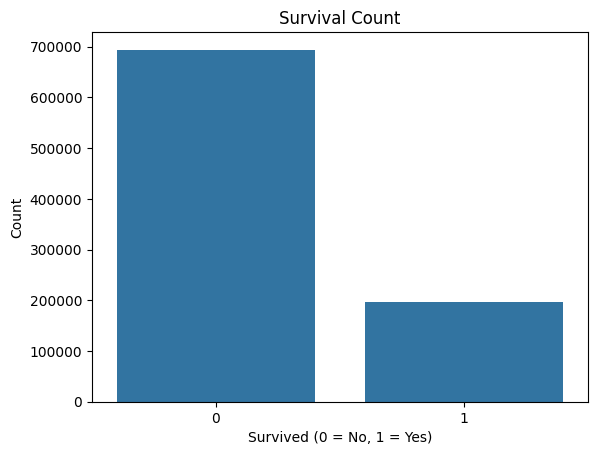

In [53]:
sns.countplot(x='survived', data=LC_data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


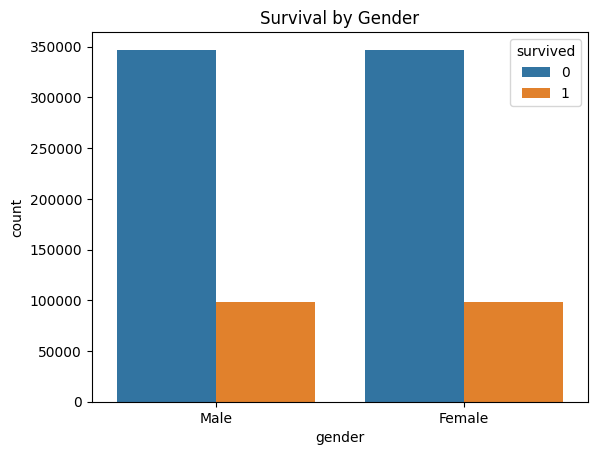

In [54]:
sns.countplot(x='gender', hue='survived', data=LC_data)
plt.title('Survival by Gender')
plt.show()


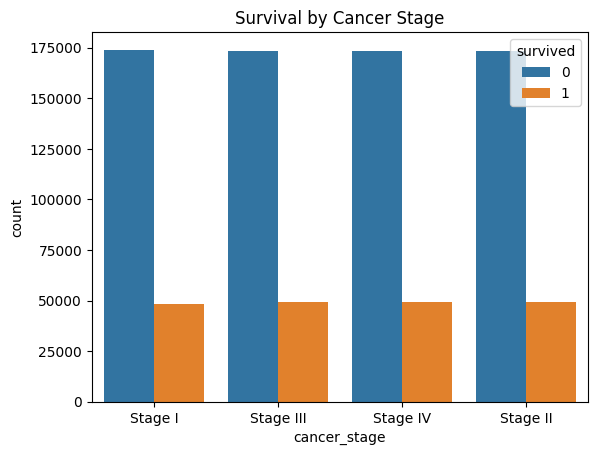

In [55]:
sns.countplot(x='cancer_stage', hue='survived', data=LC_data)
plt.title('Survival by Cancer Stage')
plt.show()


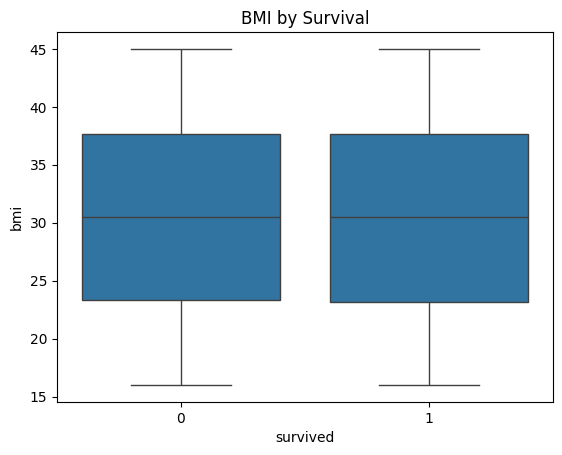

In [56]:
sns.boxplot(x='survived', y='bmi', data=LC_data)
plt.title('BMI by Survival')
plt.show()


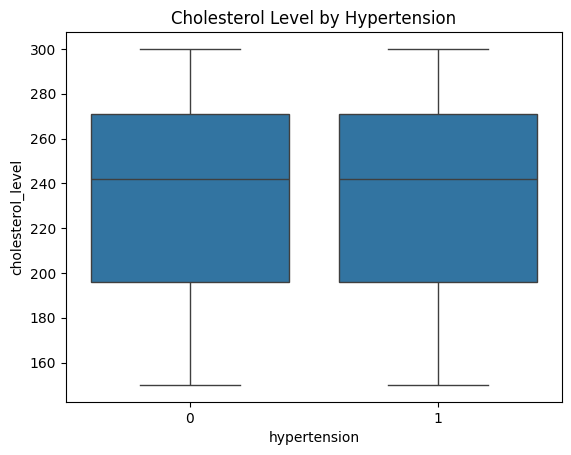

In [57]:
sns.boxplot(x='hypertension', y='cholesterol_level', data=LC_data)
plt.title('Cholesterol Level by Hypertension')
plt.show()


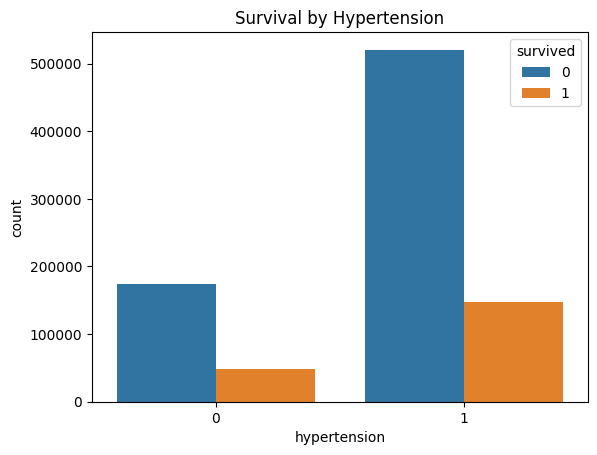

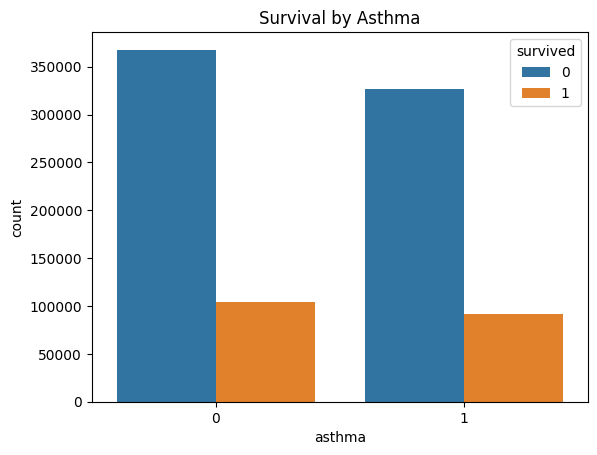

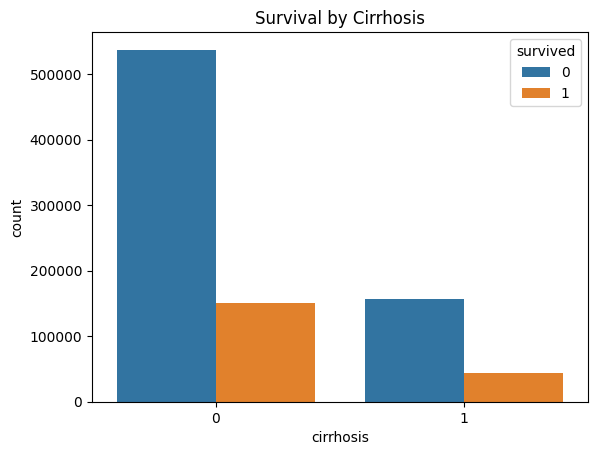

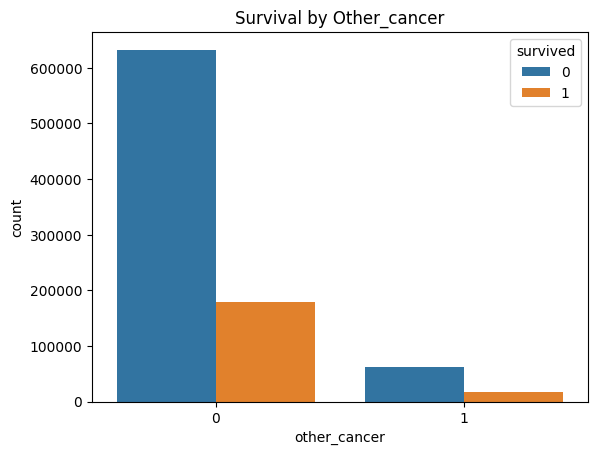

In [58]:
comorbidities = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']

for col in comorbidities:
    sns.countplot(x=col, hue='survived', data=LC_data)
    plt.title(f'Survival by {col.capitalize()}')
    plt.show()


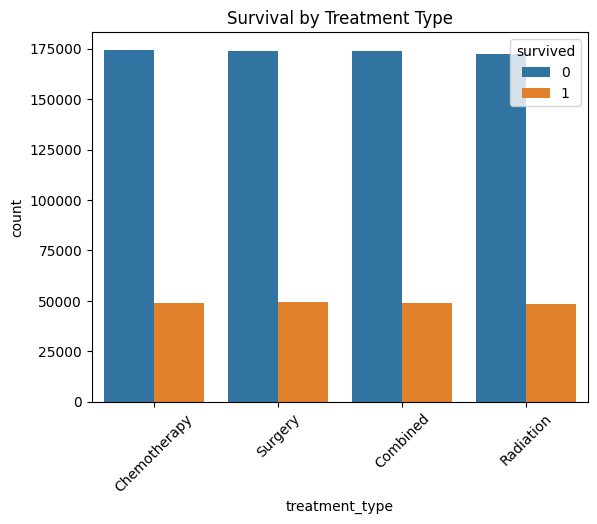

In [59]:
sns.countplot(x='treatment_type', hue='survived', data=LC_data)
plt.title('Survival by Treatment Type')
plt.xticks(rotation=45)
plt.show()


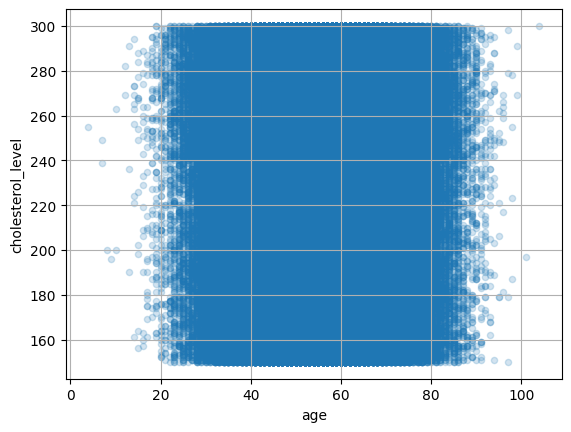

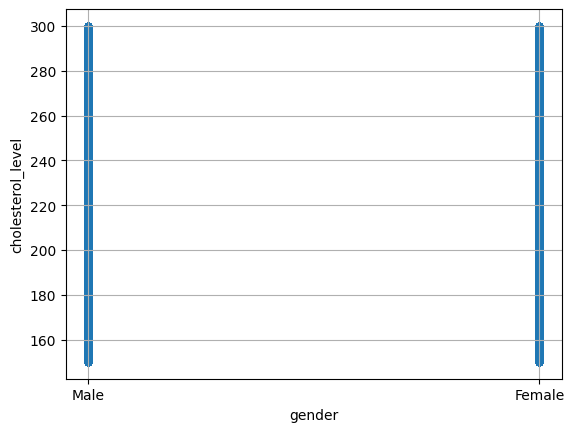

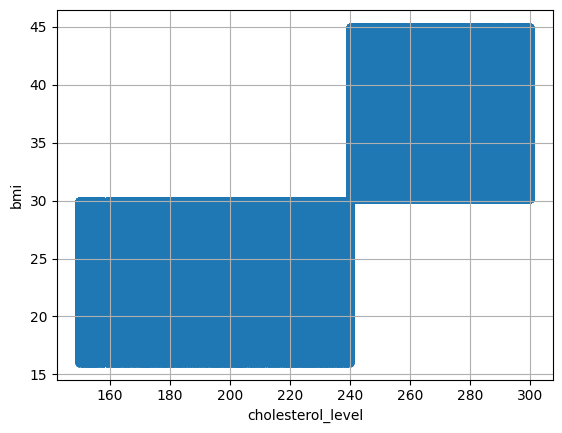

In [67]:
LC_data.plot(kind="scatter", x="age", y="cholesterol_level", grid=True, alpha=0.2)
LC_data.plot(kind="scatter", x="gender", y="cholesterol_level", grid=True,)
LC_data.plot(kind="scatter", x="cholesterol_level", y="bmi", grid=True)
plt.show()

## Stratified sampeling based on chloestrol level

In [ ]:
LC_data["clvl_cat"] = pd.cut(LC_data["cholesterol_level"],
                               bins=[125.0,160.0,245.0,290.0,np.inf],
                               labels=[1, 2,3,4])

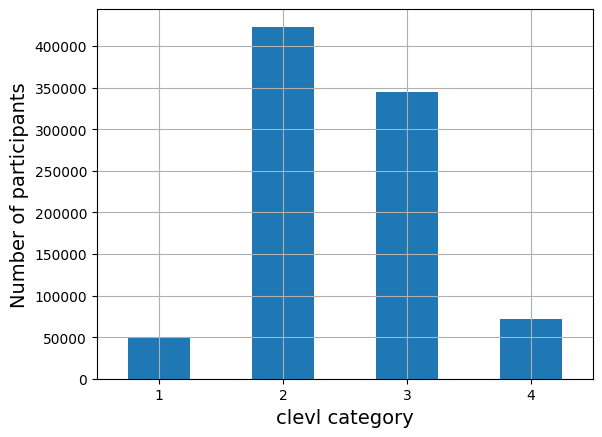

In [ ]:
LC_data["clvl_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("clevl category")
plt.ylabel("Number of participants")
#save_fig("clvl vs participants plot")  # extra code
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    LC_data, test_size=0.2, stratify=LC_data["clvl_cat"], random_state=42)

In [ ]:
 strat_test_set["clvl_cat"].value_counts() / len(strat_test_set)

,count
clvl_cat,
2,0.475607
3,0.386848
4,0.081298
1,0.056247


In [ ]:
print(strat_train_set.head())

            id   age  gender    country diagnosis_date cancer_stage  \
518457  518458  51.0    Male    Ireland     2021-11-26     Stage II   
75418    75419  58.0  Female  Lithuania     2021-04-12     Stage IV   
793130  793131  44.0    Male     Latvia     2024-01-29     Stage IV   
419024  419025  53.0  Female   Bulgaria     2017-06-24     Stage II   
280975  280976  60.0    Male    Romania     2015-01-07    Stage III   

       family_history  smoking_status   bmi  cholesterol_level  hypertension  \
518457             No  Current Smoker  34.3                263             0   
75418             Yes  Current Smoker  35.7                268             1   
793130            Yes  Passive Smoker  21.6                209             1   
419024            Yes    Never Smoked  24.4                201             1   
280975            Yes    Never Smoked  19.6                169             1   

        asthma  cirrhosis  other_cancer treatment_type end_treatment_date  \
518457       0 

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("clvl_cat",axis=1, inplace=True)#axis=0 drop rows axis=1 drop columns

In [ ]:
print(strat_train_set.head())

            id   age  gender    country diagnosis_date cancer_stage  \
518457  518458  51.0    Male    Ireland     2021-11-26     Stage II   
75418    75419  58.0  Female  Lithuania     2021-04-12     Stage IV   
793130  793131  44.0    Male     Latvia     2024-01-29     Stage IV   
419024  419025  53.0  Female   Bulgaria     2017-06-24     Stage II   
280975  280976  60.0    Male    Romania     2015-01-07    Stage III   

       family_history  smoking_status   bmi  cholesterol_level  hypertension  \
518457             No  Current Smoker  34.3                263             0   
75418             Yes  Current Smoker  35.7                268             1   
793130            Yes  Passive Smoker  21.6                209             1   
419024            Yes    Never Smoked  24.4                201             1   
280975            Yes    Never Smoked  19.6                169             1   

        asthma  cirrhosis  other_cancer treatment_type end_treatment_date  \
518457       0 

## Coverting obj or strings into numerical values

In [42]:
from sklearn.preprocessing import OrdinalEncoder

# Define custom category orders
gender_categories = ['Male', 'Female']  # male=0, female=1
cancer_stage_categories = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
smoking_status_categories = ['Never Smoked', 'Former Smoker', 'Passive Smoker', 'Current Smoker']

# Combine categories in order of columns
categories = [cancer_stage_categories, gender_categories, smoking_status_categories]

# Select relevant columns
cat_data = LC_data[['cancer_stage', 'gender', 'smoking_status']]

# Create and fit encoder
ordinal_encoder = OrdinalEncoder(categories=categories)
cat_encoded = ordinal_encoder.fit_transform(cat_data)

# Add encoded columns back to main DataFrame
LC_data['cancer_stage_encoded'] = cat_encoded[:, 0]
LC_data['gender_encoded'] = cat_encoded[:, 1]
LC_data['smoking_status_encoded'] = cat_encoded[:, 2]

# Preview first 8 rows
print(LC_data[['cancer_stage', 'gender', 'smoking_status',
               'cancer_stage_encoded', 'gender_encoded', 'smoking_status_encoded']].head(8))


  cancer_stage  gender  smoking_status  cancer_stage_encoded  gender_encoded  \
0      Stage I    Male  Passive Smoker                   0.0             0.0   
1    Stage III  Female  Passive Smoker                   2.0             1.0   
2    Stage III  Female   Former Smoker                   2.0             1.0   
3      Stage I  Female  Passive Smoker                   0.0             1.0   
4      Stage I    Male  Passive Smoker                   0.0             0.0   
5      Stage I    Male    Never Smoked                   0.0             0.0   
6    Stage III  Female  Passive Smoker                   2.0             1.0   
7     Stage IV    Male   Former Smoker                   3.0             0.0   

   smoking_status_encoded  
0                     2.0  
1                     2.0  
2                     1.0  
3                     2.0  
4                     2.0  
5                     0.0  
6                     2.0  
7                     1.0  


In [41]:
country_region_map = {
    # Western Europe
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Belgium': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'Austria': 'Western Europe',
    'Ireland': 'Western Europe',

    # Mediterranean Europe
    'Italy': 'Mediterranean Europe',
    'Spain': 'Mediterranean Europe',
    'Portugal': 'Mediterranean Europe',
    'Greece': 'Mediterranean Europe',
    'Cyprus': 'Mediterranean Europe',
    'Malta': 'Mediterranean Europe',
    'Slovenia': 'Mediterranean Europe',
    'Croatia': 'Mediterranean Europe',

    # Eastern Europe
    'Poland': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Bulgaria': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Latvia': 'Eastern Europe',
    'Estonia': 'Eastern Europe',

    # Scandinavian/Nordic Europe
    'Sweden': 'Nordic Europe',
    'Denmark': 'Nordic Europe',
    'Finland': 'Nordic Europe',
}
# Map countries to regions
countries_cat = LC_data[['country']].copy()
countries_cat['region'] = countries_cat['country'].map(country_region_map)

# Handle missing mappings (optional)
countries_cat['region'] = countries_cat['region'].fillna('Other')

# Encode regions
from sklearn.preprocessing import OrdinalEncoder

region_encoder = OrdinalEncoder()
region_encoded = region_encoder.fit_transform(countries_cat[['region']])

# Add encoded column to your main DataFrame
LC_data['region_encoded'] = region_encoded

# Check mapping
#print(dict(zip(region_encoder.categories_[0], range(len(region_encoder.categories_[0])))))
#print(cat_encoded[:8])

preview = countries_cat.copy()
preview['region_encoded'] = region_encoded

print(preview.head(8))


       country                region  region_encoded
0       Sweden         Nordic Europe             2.0
1  Netherlands        Western Europe             3.0
2      Hungary        Eastern Europe             0.0
3      Belgium        Western Europe             3.0
4   Luxembourg        Western Europe             3.0
5        Italy  Mediterranean Europe             1.0
6      Croatia  Mediterranean Europe             1.0
7      Denmark         Nordic Europe             2.0


In [ ]:
# #correlation heatmap
# #shows how strongly related the encoded categorical variables are to each other — using numerical representations of the categories
#   # +1 → perfect positive correlation
#   #  0 → no linear correlation
#   # –1 → perfect negative correlation

#   # 🔵 Blue = negative correlation
#   # 🔴 Red = positive correlation
#   # ⚪ White = no correlation
# encoded_cols = ['cancer_stage_encoded', 'gender_encoded', 'smoking_status_encoded', 'region_encoded']

# sns.heatmap(LC_data[encoded_cols].corr(), annot=True, cmap="coolwarm")
# plt.title("Correlation Between Encoded Categorical Variables")
# plt.show()


In [ ]:
# sns.pairplot(LC_data[['age', 'region_encoded', 'gender_encoded', 'cancer_stage_encoded']])
# plt.show()

## Feature scaling

without scaling most models will be biased toward ignoring values in smaller scale like 0-1 and favor columns like age

In [71]:
df = pd.DataFrame(LC_data)
print(df.columns) # Print only the column names (heading)

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived', 'region_encoded',
       'cancer_stage_encoded', 'gender_encoded', 'smoking_status_encoded'],
      dtype='object')


In [ ]:
clean_data = df[['age','cholesterol','bmi']]
df[["age", "bmi", "clevl"]] = scaler.fit_transform(df[["age", "bmi", "clevl"]]



In [70]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
LC_data_std_scaled = std_scaler.fit_transform(LC_data)

ValueError: could not convert string to float: 'Male'